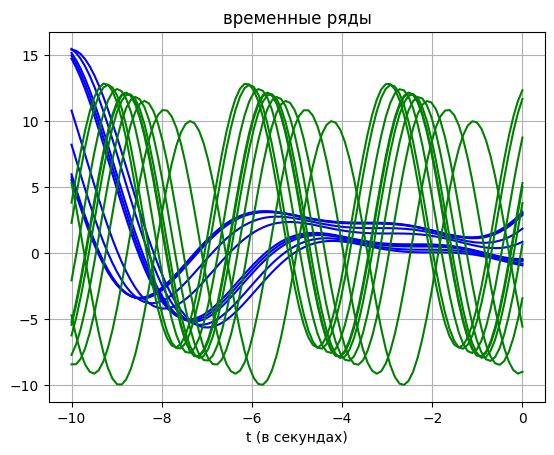

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.spatial.distance import euclidean

# Задаем seed для воспроизводимости результатов
myseed = 10
random.seed(myseed)
np.random.seed(myseed)

# Определяем модифицированную кубическую функцию
def modified_cubic_function(x):
    return np.sin(x) * (x - 3)**2 / 20  # Изменил параметры для более волнистого вида

# Определяем модифицированную пилообразную волну
def modified_sawtooth_wave(x, freq=1):
    return 2 * np.sin(x * freq)  # Изменил параметры для более плавного вида

# Создаем временной индекс
time_index = np.linspace(-10, 0, num=100)

# Список для временных рядов
tseries_list = []

# Генерируем случайные числа для добавления разнообразия в данные
arr_rand = np.random.random(size=20)

# Количество функций в каждом из двух наборов
N = 10

# Первый набор функций
for i in range(N):
    tseries_list.append(modified_cubic_function(time_index + 2 * arr_rand[i] + 5) * 5 + arr_rand[i] * 3)

# Второй набор функций
for i in range(N, 20):
    tseries_list.append(modified_sawtooth_wave(time_index + 2 * arr_rand[i] + 5, freq=2) * 5 + arr_rand[i] * 3)

# Отображение результатов
for i in range(N):
    plt.plot(time_index, tseries_list[i], '-b')  # Синяя линия для первого набора
for i in range(N, 20):
    plt.plot(time_index, tseries_list[i], '-g')  # Зеленая линия для второго набора

plt.title(r'временные ряды')
plt.xlabel(r't (в секундах)')
plt.grid()

plt.show()


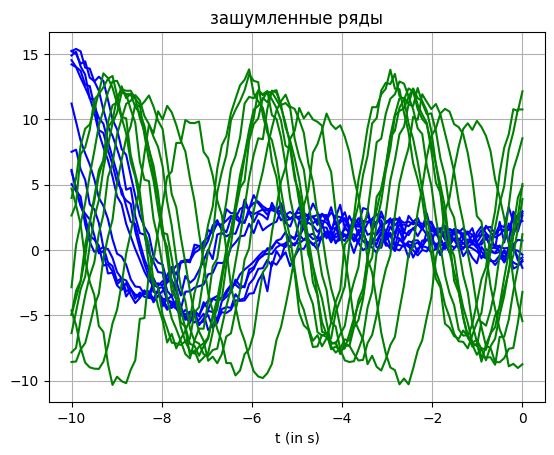

In [2]:
noise_std = 0.45 # Зашумление

for i in range(N):
    tseries_list[i] += np.random.normal(0, noise_std, size=len(time_index))
for i in range(N, 20):
    tseries_list[i] += np.random.normal(0, noise_std, size=len(time_index))

for i in range(N):
    plt.plot(time_index, tseries_list[i], '-b')
for i in range(N, 20):
    plt.plot(time_index, tseries_list[i], '-g')

plt.title(r'зашумленные ряды')
plt.xlabel(r't (in s)')
plt.grid()

Ищем шейплеты

In [3]:
def generate_candidates(Ti, min_len = 3, max_len = 100):
    candidates = []
    for l in range(min_len, max_len + 1):
        for i in range(len(Ti) - l + 1):
            subsequence = Ti[i:i + l]
            candidates.append(subsequence)
    return candidates

In [4]:
def distances_func(S, Wi_l):
    distances = [euclidean(S, candidate) for candidate in Wi_l]
    return distances

In [5]:
def candidates_func(DS):
    quality = np.mean(np.sqrt(DS))
    return quality

In [6]:
def insert_shapelet(rShapelets, shapelet):
    result = []
    i = 0
    for i in range(len(rShapelets)):
        if rShapelets[i][1] <= shapelet[1]:
            result += [rShapelets[i]]
        if rShapelets[i][1] > shapelet[1]:
            if i == 0 or rShapelets[i - 1][1] < shapelet[1]:
                result += [shapelet]
            else:
                result += [rShapelets[i - 1]]
    return result

In [7]:
def merge(k, kShapelets, shapelets):
    if len(kShapelets) == 0:
        return shapelets[0:k]
    result = kShapelets
    for shapelet in shapelets:
        if shapelet[1] < kShapelets[len(kShapelets) - 1][1]:
            kShapelets = insert_shapelet(result, shapelet)
    return result

In [8]:
def filter_shapelets(x, min = 0.05):
    result = []
    for xi in x:
        if xi[1] <= min:
            result += [xi]
    return result

In [9]:
def shapelet_selection(tseries_list, k = 50, min_len = 3, max_len = 100):
    kShapelets = []
    for tseries in tseries_list:
        shapelets = []
        for l in range(min_len, max_len + 1):
            candidates = generate_candidates(tseries, min_len, max_len)
            for candidate in candidates:
                distances = distances_func(candidate, candidates)
                quality = candidates_func(distances)
                shapelets.append((candidate, quality))
        shapelets = filter_shapelets(shapelets, quality)
        shapelets.sort(key=lambda x: x[1], reverse=True)
        kShapelets = merge(k, kShapelets, shapelets)
    return kShapelets

In [10]:
K_shapletes_сubic = shapelet_selection(tseries_list[0:10], k = 20, min_len= 4 , max_len= 4)
K_shapletes_wave = shapelet_selection(tseries_list[11:20], k = 20, min_len= 4 , max_len= 4)
print(K_shapletes_сubic)
print(K_shapletes_wave)

[(array([3.28161563, 2.14140553, 2.64041921, 2.96192539]), 1.776425356635203), (array([2.91415885, 2.64243438, 3.27942994, 2.09867897]), 1.775078064129663), (array([2.70227005, 2.91415885, 2.64243438, 3.27942994]), 1.774343551095735), (array([0.65031936, 0.94520542, 1.56860387, 1.98806653]), 1.7692108081243476), (array([1.6108904 , 1.85834727, 0.52778289, 1.38974489]), 1.7656043801848353), (array([1.44072736, 1.6108904 , 1.85834727, 0.52778289]), 1.7648274054900968), (array([1.74726933, 3.28161563, 2.14140553, 2.64041921]), 1.7590068868090807), (array([0.81845916, 1.41876818, 1.1369277 , 1.04017624]), 1.7576182286616426), (array([2.64243438, 3.27942994, 2.09867897, 2.50464677]), 1.7469931240110799), (array([1.88494065, 1.74726933, 3.28161563, 2.14140553]), 1.7459953661586678), (array([2.60249303, 1.84678094, 1.95536995, 3.20725177]), 1.740643006315703), (array([3.27942994, 2.09867897, 2.50464677, 2.54772793]), 1.7395948949858648), (array([3.0992259 , 1.47793738, 2.20967106, 2.27305905]

Формируем датасет

In [11]:
import random

x = []
Y = []
shpletes_qual = K_shapletes_сubic + K_shapletes_wave

for i in range(len(shpletes_qual)):
    res = list(shpletes_qual[i][0]) + [shpletes_qual[i][1]]
    x.append(res)

    if i < len(K_shapletes_сubic):
        Y.append(1)
    else:
        Y.append(2)

X_train = []
X_test = []
Y_train = []
Y_test = []

indexes = np.arange(len(Y))
random.shuffle(indexes)
for i in range(int(len(Y) * 0.7)):
    X_train.append(x[indexes[i] - 1])
    Y_train.append(Y[indexes[i] - 1])

for i in range(int(len(Y) * 0.7), len(Y)):
    X_test.append(x[indexes[i] - 1])
    Y_test.append(Y[indexes[i] - 1])

Y_train, Y_test

([2,
  1,
  1,
  2,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  1,
  1,
  1,
  2,
  1,
  2,
  2,
  1,
  1,
  2,
  1,
  1,
  1,
  1],
 [1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2])

Обучение

In [12]:

from pyts.classification import TimeSeriesForest

clf = TimeSeriesForest(random_state=42)
clf.fit(X_train, Y_train)

print(f"Accuracy {clf.score(X_test, Y_test)}")
for i in range(len(Y_test)):
    print(f"{i + 1} объект:")
    x_test_np = np.array(X_test[i]).reshape(1, -1)
    print(f"Вектор вероятности принадлежности к классам: {clf.predict_proba(x_test_np)}")
    print(f"Истинный класс для предсказаний: {Y_test[i]}")

Accuracy 1.0
1 объект:
Вектор вероятности принадлежности к классам: [[0.896 0.104]]
Истинный класс для предсказаний: 1
2 объект:
Вектор вероятности принадлежности к классам: [[0.046 0.954]]
Истинный класс для предсказаний: 2
3 объект:
Вектор вероятности принадлежности к классам: [[0.998 0.002]]
Истинный класс для предсказаний: 1
4 объект:
Вектор вероятности принадлежности к классам: [[1. 0.]]
Истинный класс для предсказаний: 1
5 объект:
Вектор вероятности принадлежности к классам: [[0.032 0.968]]
Истинный класс для предсказаний: 2
6 объект:
Вектор вероятности принадлежности к классам: [[0. 1.]]
Истинный класс для предсказаний: 2
7 объект:
Вектор вероятности принадлежности к классам: [[0.928 0.072]]
Истинный класс для предсказаний: 1
8 объект:
Вектор вероятности принадлежности к классам: [[0.244 0.756]]
Истинный класс для предсказаний: 2
9 объект:
Вектор вероятности принадлежности к классам: [[0.03 0.97]]
Истинный класс для предсказаний: 2
10 объект:
Вектор вероятности принадлежности к 

Итог: классификатор успешно справился с определением класса